# PROYECTO INDIVIDUAL Nº1

***Machine Learning Operations (MLOps)***

**Proceso EDA**

**1 - Importación de librerías**

In [3019]:
import pandas as pd
import numpy as np
import ast
import pyarrow as pa
import pyarrow.parquet as pq
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

**2 - Lectura del archivo PARQUET y creación del Data Frame**

In [3020]:
df0= pd.read_parquet('steam_games.parquet') # Lectura del archivo Parquet en un DataFrame de pandas - df0 data frame del proyecto (Rev. 0)

2.a - Consulta de las características de Data Frame

In [3021]:
df0.shape    #Consulta de las características de dataset. Tiene 324469 registros y 10 campos

(324469, 10)

In [3022]:
df0.head(10)   #Consulta de la estructura del dataset

,genres,app_name,discount_price,specs,price,early_access,sentiment,metascore,release_year,imputacion
0,Action,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018,0
1,Casual,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018,0
2,Indie,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018,0
3,Simulation,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018,0
4,Strategy,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018,0
5,Free to Play,Ironbound,NaN,Single-player,NaN,False,Mostly Positive,NaN,2018,0
6,Free to Play,Ironbound,NaN,Multi-player,NaN,False,Mostly Positive,NaN,2018,0
7,Free to Play,Ironbound,NaN,Online Multi-Player,NaN,False,Mostly Positive,NaN,2018,0
8,Free to Play,Ironbound,NaN,Cross-Platform Multiplayer,NaN,False,Mostly Positive,NaN,2018,0
9,Free to Play,Ironbound,NaN,Steam Achievements,NaN,False,Mostly Positive,NaN,2018,0


In [3023]:
df0.tail()

,genres,app_name,discount_price,specs,price,early_access,sentiment,metascore,release_year,imputacion
324464,Design & Illustration,Robotpencil Presents: Creative Composition,NaN,Sin Datos,3.99,False,Sin Datos,NaN,2018,1
324465,Sin Datos,Robotpencil Presents: Creative Composition,NaN,Sin Datos,3.99,False,Sin Datos,NaN,2018,1
324466,Sin Datos,The Gamble House,NaN,Captions available,4.99,False,Sin Datos,NaN,2016,1
324467,Design & Illustration,Kalen Chock Presents: 2017 Free Tutorial,NaN,Sin Datos,NaN,False,Sin Datos,NaN,2018,1
324468,Sin Datos,Kalen Chock Presents: 2017 Free Tutorial,NaN,Sin Datos,NaN,False,Sin Datos,NaN,2018,1


2.b – Consulta de las cantidades de registros por campos y tipos de datos

In [3024]:
df0.info() #Consulta de las cantidades de registros por campos y tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324469 entries, 0 to 324468
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   genres          324469 non-null  object 
 1   app_name        324469 non-null  object 
 2   discount_price  2701 non-null    float64
 3   specs           324469 non-null  object 
 4   price           292012 non-null  float64
 5   early_access    324469 non-null  bool   
 6   sentiment       324469 non-null  object 
 7   metascore       25616 non-null   float64
 8   release_year    324469 non-null  int64  
 9   imputacion      324469 non-null  int32  
dtypes: bool(1), float64(3), int32(1), int64(1), object(4)
memory usage: 21.4+ MB


2.c-Consulta de cantidad de nulos por campo

In [3025]:
df0.isna().sum() #Consulta de nulos por campo

genres                 0
app_name               0
discount_price    321768
specs                  0
price              32457
early_access           0
sentiment              0
metascore         298853
release_year           0
imputacion             0
dtype: int64

**3 - identificación de features importantes**

1) genres - Variable cualitativa categórica nominal - Requerida para el proyecto


2) app_name - Variable cualitativa categórica nominal - Irrelevante para el proyecto

3) discount_price - Variable cuantitativa continua - Debe verificarse la correlación con la variable price

4) specs - Variable cualitativa categórica nominal - Evaluar para el proyecto

5) price - Variable cuantitativa continua - Requerida para el proyecto

6) early_accesss - Variable booleana - Requerida para el proyecto

7) sentiment - Variable cualitativa categórica ordinal - Evaluar para el proyecto

8) metascore - Variable cuantitativa continua - Evaluar para el proyecto

9) release_year - Variable cuantitativa discreta - Evaluar para el proyecto

10) imputacion - Variable booleana - Irrelevante para el proyecto

3.a - Eliminación de variables consideradas irrelevantes y/o redundantes

In [3026]:
columnas_a_eliminar = ['imputacion']
df0.drop(columns=columnas_a_eliminar, inplace=True)  #Las columnas app_name e imputación se eliminan por irrelevantes para el análisis

3.b - Eliminación de nulos de la columns price. Como es nuestra etiqueta, los valores nulos no nos servirán para el proyecto

In [3027]:
df0.dropna(subset='price', inplace=True) #Eliminación de nulos de la columna price 32457 en total

In [3028]:
df0.head(10) #Consulta del data frame

,genres,app_name,discount_price,specs,price,early_access,sentiment,metascore,release_year
0,Action,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018
1,Casual,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018
2,Indie,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018
3,Simulation,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018
4,Strategy,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018
58,Action,弹炸人2222,0.83,Single-player,0.99,False,Sin Datos,NaN,2017
59,Adventure,弹炸人2222,0.83,Single-player,0.99,False,Sin Datos,NaN,2017
60,Casual,弹炸人2222,0.83,Single-player,0.99,False,Sin Datos,NaN,2017
61,Action,Battle Royale Trainer,NaN,Single-player,3.99,False,Mixed,NaN,2018
62,Action,Battle Royale Trainer,NaN,Steam Achievements,3.99,False,Mixed,NaN,2018


**4 - Transformaciones**

4.a - Creación de la columna años (anios) del juego

In [3029]:
fecha_actual = datetime.datetime.now()      #Obtener la fecha actual

anio_actual = fecha_actual.year     # Obtener el año actual de la fecha actual

In [3030]:
df0['anios'] = anio_actual - df0['release_year']  #Creación de columna calculada anios

In [3031]:
df0.head()

,genres,app_name,discount_price,specs,price,early_access,sentiment,metascore,release_year,anios
0,Action,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018,5
1,Casual,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018,5
2,Indie,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018,5
3,Simulation,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018,5
4,Strategy,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018,5


**5 - Estadísticas descriptivas**

In [3032]:
df_price = df0.drop_duplicates(subset='app_name') #df_price es un data frame auxiliar

In [3033]:
df_price.shape  #Consulta del data frame

(27214, 10)

In [3034]:
df_price.head(10)   #Consulta del data frame

,genres,app_name,discount_price,specs,price,early_access,sentiment,metascore,release_year,anios
0,Action,Lost Summoner Kitty,4.49,Single-player,4.99,False,Sin Datos,NaN,2018,5
58,Action,弹炸人2222,0.83,Single-player,0.99,False,Sin Datos,NaN,2017,6
61,Action,Battle Royale Trainer,NaN,Single-player,3.99,False,Mixed,NaN,2018,5
67,Free to Play,SNOW - All Access Basic Pass,NaN,Single-player,9.99,False,Sin Datos,NaN,2018,5
111,Free to Play,SNOW - All Access Pro Pass,NaN,Single-player,18.99,False,Sin Datos,NaN,2018,5
155,Free to Play,SNOW - All Access Legend Pass,NaN,Single-player,29.99,False,Sin Datos,NaN,2018,5
211,Action,Army of Tentacles: (Not) A Cthulhu Dating Sim:...,8.79,Single-player,10.99,False,Sin Datos,NaN,2018,5
221,Casual,Beach Rules,NaN,Single-player,3.99,False,Sin Datos,NaN,2018,5
223,Casual,Planetarium 2 - Zen Odyssey,NaN,Single-player,2.99,False,Sin Datos,NaN,2018,5
226,Adventure,The first thrust of God,NaN,Single-player,1.59,False,Sin Datos,NaN,2018,5


In [3035]:
df_price.describe() #Consulta del data frame

,discount_price,price,metascore,release_year,anios
count,138.000000,27214.000000,2452.000000,27214.000000,27214.000000
mean,4.000942,9.366826,72.219005,2014.721908,8.278092
std,5.299309,16.465615,10.814851,3.567304,3.567304
min,0.490000,0.490000,20.000000,1970.000000,2.000000
25%,0.690000,2.990000,66.000000,2014.000000,6.000000
50%,1.890000,4.990000,74.000000,2016.000000,7.000000
75%,4.632500,9.990000,80.000000,2017.000000,9.000000
max,31.490000,995.000000,96.000000,2021.000000,53.000000


**6 – Tratamiento de Outliers**

Para asumir valores atípicos, se usa la Regla de las Tres Sigmas

In [3036]:
promedio_price = df_price['price'].mean()   #Cálculo de la media
promedio_price

9.36682589843463

In [3037]:
std_price = df_price['price'].std()     #Cálculo de la desviación standart
std_price

16.46561479857127

In [3038]:
min_outlier = promedio_price - 3*std_price  #Valor inferior del límite
min_outlier

-40.03001849727919

In [3039]:
max_outlier = promedio_price + 3*std_price  #Valor superior del límite 
max_outlier

58.76367029414844

In [3040]:
del df_price

6.a - Creación un nuevo dataframe eliminando los outliers

In [3041]:
df1 = df0[df0['price']<=max_outlier]    #df1 data frame del proyecto (Rev. 1)

In [3042]:
del df0

In [3043]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288659 entries, 0 to 324466
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   genres          288659 non-null  object 
 1   app_name        288659 non-null  object 
 2   discount_price  1936 non-null    float64
 3   specs           288659 non-null  object 
 4   price           288659 non-null  float64
 5   early_access    288659 non-null  bool   
 6   sentiment       288659 non-null  object 
 7   metascore       23715 non-null   float64
 8   release_year    288659 non-null  int64  
 9   anios           288659 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 22.3+ MB


**7 – Análisis de variables**

7.a - Análisis de la variable anios

In [3044]:
df_anios = df1.drop_duplicates(subset=['app_name']) #Eliminanos duplicados por genres - df_genres es un data frame auxiliar

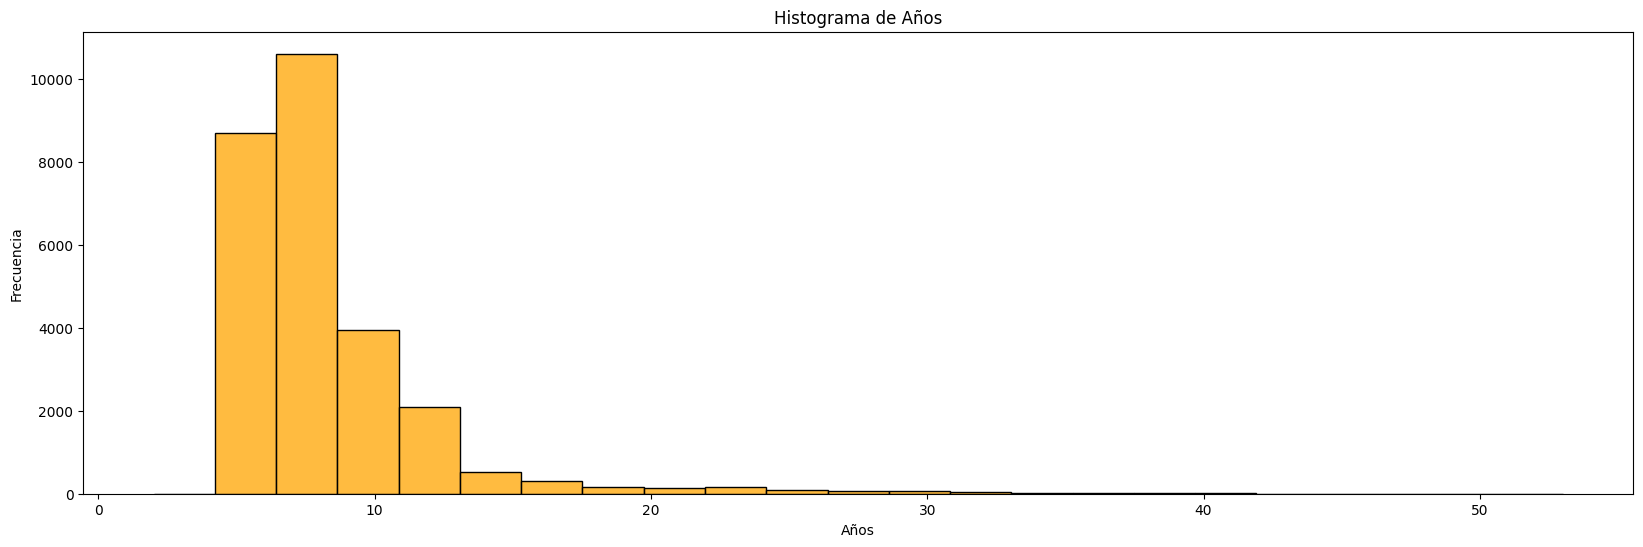

In [3045]:
plt.figure(figsize=(20, 6))
# Crear el histograma utilizando Seaborn
sns.histplot(data=df_anios, x='anios', kde=False, bins=23, color='orange')

# Añadir etiquetas y título
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.title('Histograma de Años')

# Mostrar el histograma
plt.show()

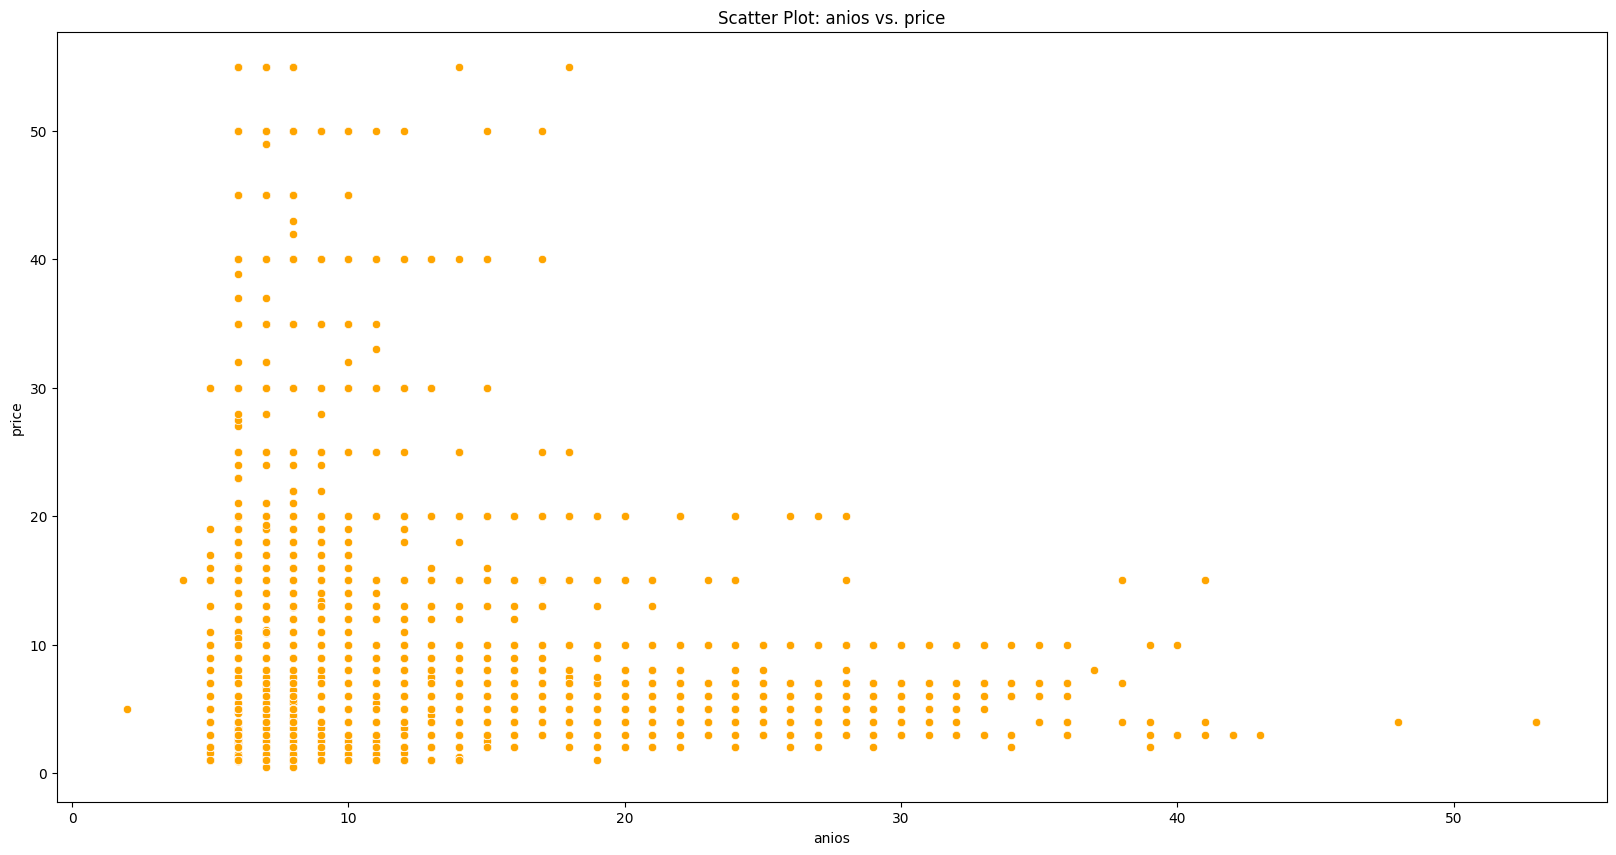

In [3046]:
# Crear el scatter plot
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_anios, x='anios', y='price', color='orange')

# Añadir etiquetas y título
plt.xlabel('anios')
plt.ylabel('price')
plt.title('Scatter Plot: anios vs. price')

plt.show()

In [3047]:
del df_anios

7.b - Análisis de la variable discount_price

In [3048]:
df_discount = df1.drop_duplicates(subset='app_name')

In [3049]:
df_discount.discount_price.isna().sum()

26791

In [3050]:
df_discount.dropna()

,genres,app_name,discount_price,specs,price,early_access,sentiment,metascore,release_year,anios
13235,Casual,Oozi: Earth Adventure,0.74,Single-player,4.99,False,Very Positive,66.0,2013,10
130566,Action,Hidden & Dangerous: Action Pack,4.19,Single-player,5.99,False,Sin Datos,74.0,2000,23
161387,Adventure,Subsurface Circular,4.79,Single-player,5.99,False,Overwhelmingly Positive,83.0,2017,6


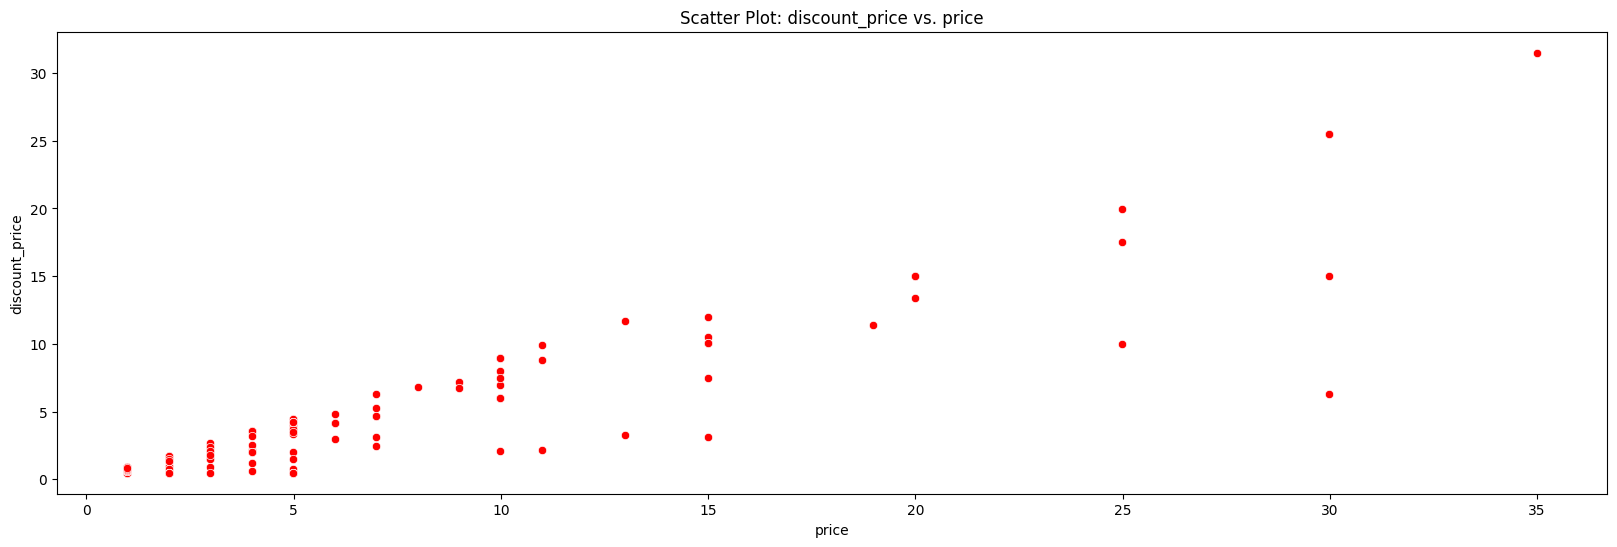

In [3051]:
# Crear el scatter plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_discount, x='price', y='discount_price', color='red')

# Añadir etiquetas y título
plt.xlabel('price')
plt.ylabel('discount_price')
plt.title('Scatter Plot: discount_price vs. price')

plt.show()

In [3052]:
del df_discount

Se ve cierta correlación entre ambas variables y por otro lado el numero de nulos de la variable discount_price es importante, por lo que eliminaremos este campo.

In [3053]:
columnas_a_eliminar = ['discount_price']
df1.drop(columns=columnas_a_eliminar, inplace=True)  #La columna discount_price es redundante. Se eliminan por irrelevantes para el analisis

In [3054]:
df1.head(20)

,genres,app_name,specs,price,early_access,sentiment,metascore,release_year,anios
0,Action,Lost Summoner Kitty,Single-player,4.99,False,Sin Datos,NaN,2018,5
1,Casual,Lost Summoner Kitty,Single-player,4.99,False,Sin Datos,NaN,2018,5
2,Indie,Lost Summoner Kitty,Single-player,4.99,False,Sin Datos,NaN,2018,5
3,Simulation,Lost Summoner Kitty,Single-player,4.99,False,Sin Datos,NaN,2018,5
4,Strategy,Lost Summoner Kitty,Single-player,4.99,False,Sin Datos,NaN,2018,5
58,Action,弹炸人2222,Single-player,0.99,False,Sin Datos,NaN,2017,6
59,Adventure,弹炸人2222,Single-player,0.99,False,Sin Datos,NaN,2017,6
60,Casual,弹炸人2222,Single-player,0.99,False,Sin Datos,NaN,2017,6
61,Action,Battle Royale Trainer,Single-player,3.99,False,Mixed,NaN,2018,5
62,Action,Battle Royale Trainer,Steam Achievements,3.99,False,Mixed,NaN,2018,5


7.c - Análisis de la variable sentiment

La variable es cualitativa ordinal, por lo que aplicaremos la función map() y Label Encoder

In [3055]:
df1.sentiment.unique()

array(['Sin Datos', 'Mixed', 'Very Positive', 'Overwhelmingly Positive',
       'Mostly Positive', 'Positive', 'Mostly Negative', 'Very Negative',
       'Negative', 'Overwhelmingly Negative'], dtype=object)

In [3056]:
mapeo_calif = {'Sin Datos': -1, 'Overwhelmingly Negative': 1, 'Very Negative': 2,
               'Negative': 3, 'Mostly Negative': 4, 'Mixed': 5, 'Mostly Positive': 6,
               'Positive': 7, 'Very Positive': 8, 'Overwhelmingly Positive': 9}                 # Diccionario para el mapeo

label_encoder = LabelEncoder()                                                                  # Crear una instancia del LabelEncoder
df1['sentiment'] = label_encoder.fit_transform([mapeo_calif[x] for x in df1['sentiment']])

In [3057]:
df1.head()

,genres,app_name,specs,price,early_access,sentiment,metascore,release_year,anios
0,Action,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
1,Casual,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
2,Indie,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
3,Simulation,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
4,Strategy,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5


In [3058]:
df1.isna().sum() #Consulta de nulos por campo

genres               0
app_name             0
specs                0
price                0
early_access         0
sentiment            0
metascore       264944
release_year         0
anios                0
dtype: int64

In [3059]:
df_sentiment = df1.drop_duplicates(subset='app_name')

In [3060]:
df_sentiment.head()

,genres,app_name,specs,price,early_access,sentiment,metascore,release_year,anios
0,Action,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
58,Action,弹炸人2222,Single-player,0.99,False,0,NaN,2017,6
61,Action,Battle Royale Trainer,Single-player,3.99,False,5,NaN,2018,5
67,Free to Play,SNOW - All Access Basic Pass,Single-player,9.99,False,0,NaN,2018,5
111,Free to Play,SNOW - All Access Pro Pass,Single-player,18.99,False,0,NaN,2018,5


<Axes: xlabel='sentiment', ylabel='price'>

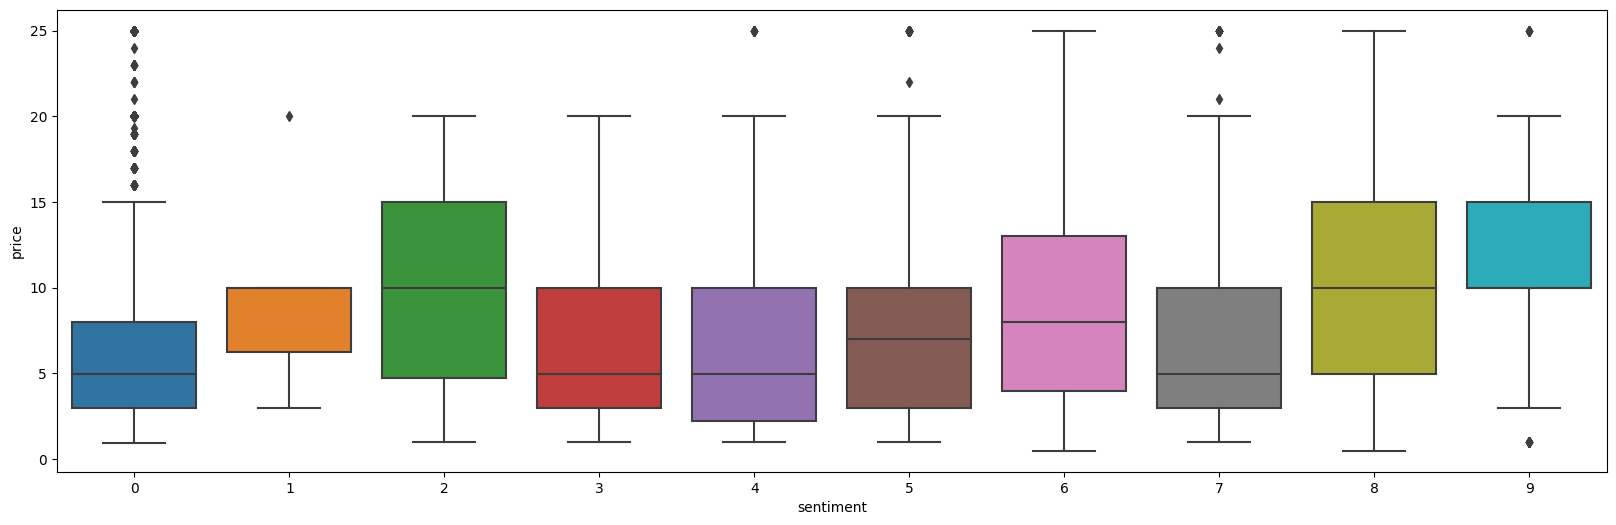

In [3061]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='sentiment', y='price',data=df_sentiment[df_sentiment['price']<25]) #Diagramas de cajas por genres filtrado por menores de 25

In [3062]:
del df_sentiment

Se observa cierta tendencia al incremento del precio con las mejores calificaciones

7.d - Análisis de la variable metascore

In [3063]:
df_metascore = df1.drop_duplicates(subset='app_name').dropna(subset='metascore')

In [3064]:
df_metascore.head(10)

,genres,app_name,specs,price,early_access,sentiment,metascore,release_year,anios
399,Action,Half-Life,Single-player,9.99,False,9,96.0,1998,25
542,Strategy,Disciples II: Gallean's Return,Single-player,6.99,False,6,84.0,2006,17
545,Strategy,Disciples II: Rise of the Elves,Single-player,6.99,False,8,80.0,2006,17
548,Action,The Ship: Murder Party,Single-player,9.99,False,8,76.0,2006,17
640,Action,Advent Rising,Single-player,9.99,False,6,70.0,2005,18
642,Indie,DEFCON,Single-player,9.99,False,8,84.0,2006,17
675,Casual,Gumboy - Crazy Adventures™,Single-player,4.99,False,5,69.0,2006,17
677,Strategy,Ghost Master®,Single-player,4.99,False,8,81.0,2003,20
679,Adventure,Dreamfall: The Longest Journey,Single-player,19.99,False,8,75.0,2006,17
681,Racing,FlatOut 2™,Single-player,9.99,False,8,76.0,2006,17


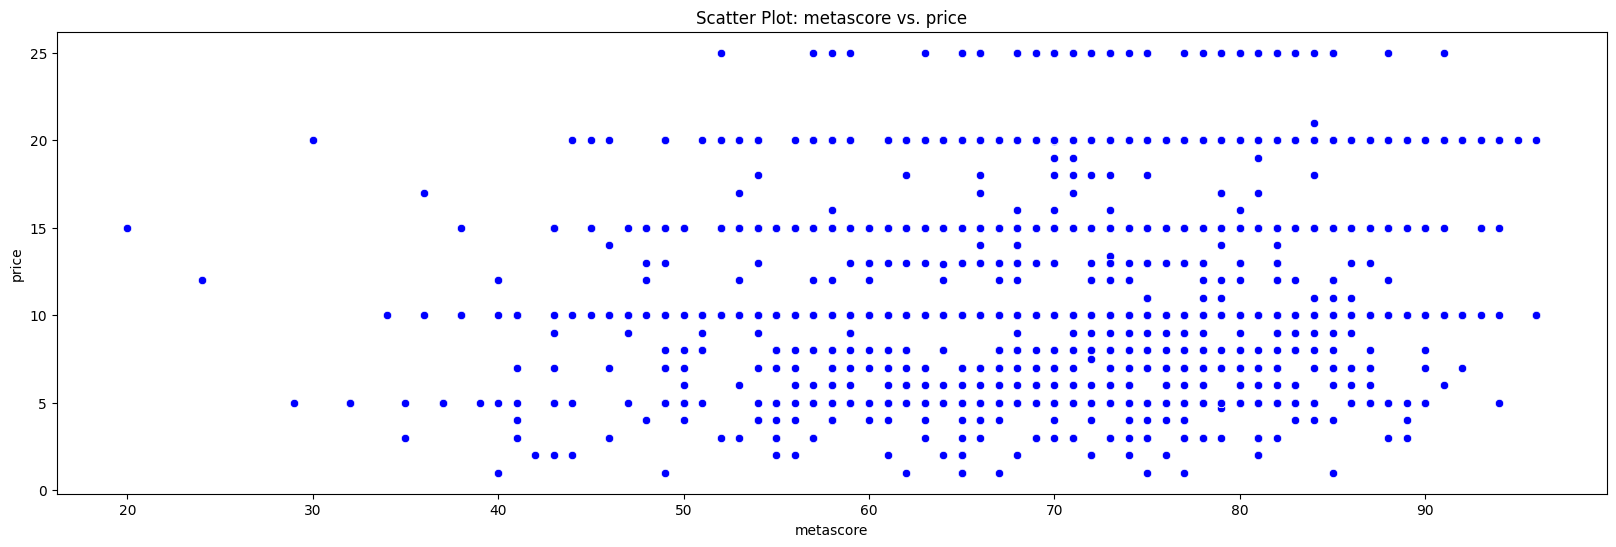

In [3065]:
# Crear el scatter plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_metascore[df_metascore['price']<25], x='metascore', y='price', color='blue')

# Añadir etiquetas y título
plt.xlabel('metascore')
plt.ylabel('price')
plt.title('Scatter Plot: metascore vs. price')

plt.show()

No se observa una correlación que a mayor metascore aumente el precio

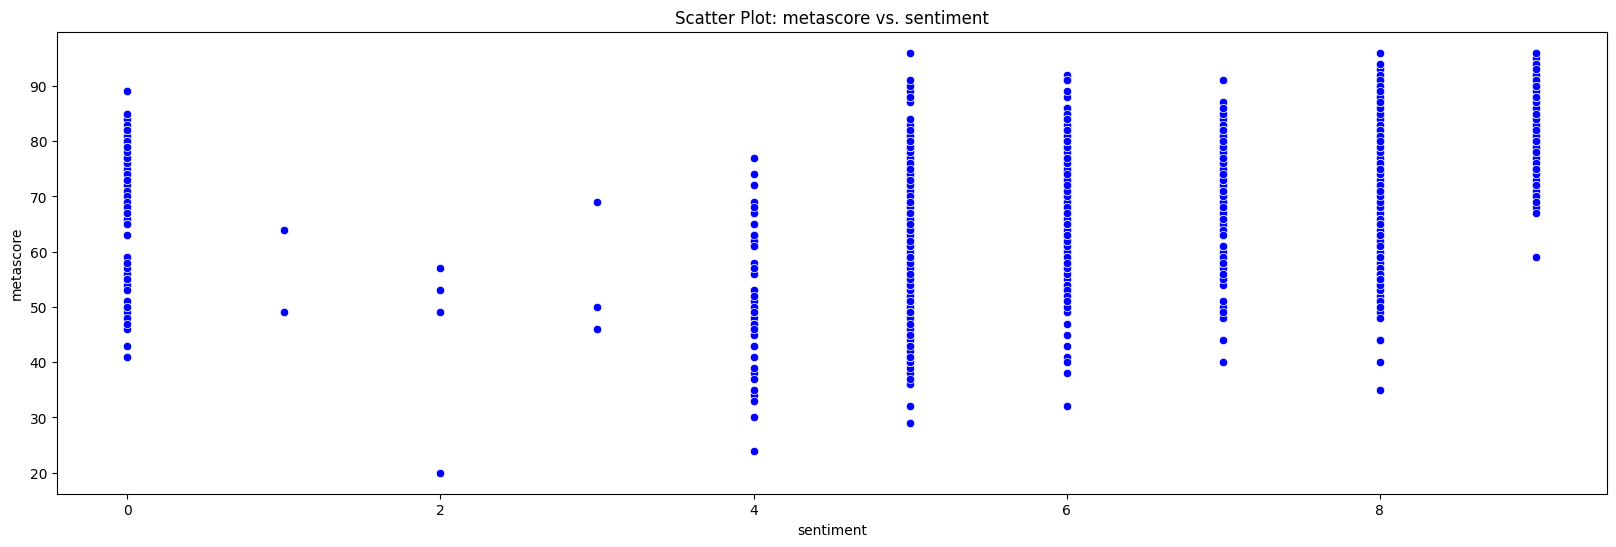

In [3066]:
# Crear el scatter plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df_metascore, x='sentiment', y='metascore', color='blue')

# Añadir etiquetas y título
plt.xlabel('sentiment')
plt.ylabel('metascore')
plt.title('Scatter Plot: metascore vs. sentiment')

plt.show()

In [3067]:
del df_metascore

Se observa cierta correlación entre las variables sentiment y metascore

7.e - Análisis de la variable genres respecto a la etiqueta price

In [3068]:
df1.genres.nunique() #Consulta de la cantidad de valores únicos del campo genres

23

In [3069]:
df1.genres.unique() #Consulta de valores únicos del campo genres

array(['Action', 'Casual', 'Indie', 'Simulation', 'Strategy', 'Adventure',
       'Free to Play', 'Sports', 'RPG', 'Racing', 'Early Access',
       'Massively Multiplayer', 'Web Publishing', 'Education',
       'Software Training', 'Utilities', 'Design & Illustration',
       'Animation & Modeling', 'Audio Production', 'Video Production',
       'Photo Editing', 'Accounting', 'Sin Datos'], dtype=object)

In [3070]:
df_genres = df1.drop_duplicates(subset=['genres','app_name']) #Eliminanos duplicados por genres - df_genres es un data frame auxiliar

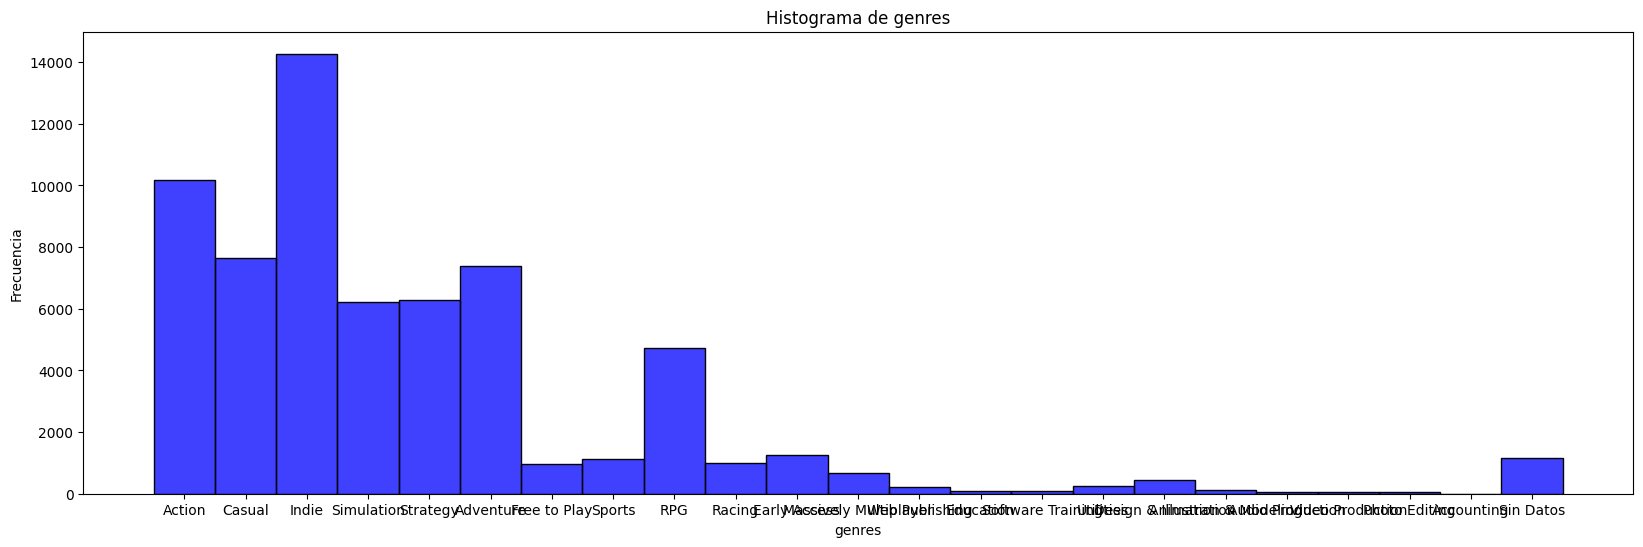

In [3071]:
plt.figure(figsize=(20, 6))
# Crear el histograma utilizando Seaborn
sns.histplot(data=df_genres, x='genres', kde=False, bins=23, color='blue')

# Añadir etiquetas y título
plt.xlabel('genres')
plt.ylabel('Frecuencia')
plt.title('Histograma de genres')

# Mostrar el histograma
plt.show()

In [3072]:
bin_counts = df_genres['genres'].value_counts() # Calcula el conteo de observaciones en cada bin

In [3073]:
df_conteo = pd.DataFrame(bin_counts).reset_index()  #Crea un data frame con los generos y el conteo - df_conteo es un data frame auxiliar
df_conteo.columns = ['genres', 'cantidad']

In [3074]:
df_conteo['porcentaje'] = round((df_conteo['cantidad']/df_genres.shape[0])*100,2)   #Crea una columna de porcentajes de los conteos 

In [3075]:
df_conteo.head(30)  #Consulta del data frame

,genres,cantidad,porcentaje
0,Indie,14271,22.19
1,Action,10164,15.80
2,Casual,7648,11.89
3,Adventure,7377,11.47
4,Strategy,6288,9.78
5,Simulation,6221,9.67
6,RPG,4719,7.34
7,Early Access,1266,1.97
8,Sin Datos,1157,1.80
9,Sports,1137,1.77


El siguiente ciclo for permite conocer hasta que ítem se representa el 85% de la muestra

In [3076]:
muestra = 0                                 #Ciclo for permite conocer hasta que ítem se representa el 85% de la muestra
item = 0
for i in range(0,df_conteo.shape[0]):
    if muestra <= 85:
        item +=1
        muestra = muestra + df_conteo.iloc[i,2]
    else:
        break
print(item-1)

6


De los resultados obtenidos de frecuencias de géneros, vamos en considerar los primeros 7, que representan aproximadamente el 85% del conjunto

Eliminacion de generos irrelevantes para el proceso

In [3077]:
lista_gen_del = df_conteo.iloc[7:23,0].to_list()    #Creacion de una lista para eliminar registros
lista_gen_del

['Early Access',
 'Sin Datos',
 'Sports',
 'Racing',
 'Free to Play',
 'Massively Multiplayer',
 'Design & Illustration',
 'Utilities',
 'Web Publishing',
 'Animation & Modeling',
 'Education',
 'Software Training',
 'Audio Production',
 'Photo Editing',
 'Video Production',
 'Accounting']

In [3078]:
del df_genres
del df_conteo

In [3079]:
mask = df1['genres'].isin(lista_gen_del)    # Crear una máscara booleana para filtrar las filas a eliminar
df2 = df1[~mask]    # Eliminar las filas que cumplen con la condición - df2 es el data frame del proyecto (Rev.2)

In [3080]:
del df1

In [3081]:
df2.head(20)    #Consulta de data frame

,genres,app_name,specs,price,early_access,sentiment,metascore,release_year,anios
0,Action,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
1,Casual,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
2,Indie,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
3,Simulation,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
4,Strategy,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
58,Action,弹炸人2222,Single-player,0.99,False,0,NaN,2017,6
59,Adventure,弹炸人2222,Single-player,0.99,False,0,NaN,2017,6
60,Casual,弹炸人2222,Single-player,0.99,False,0,NaN,2017,6
61,Action,Battle Royale Trainer,Single-player,3.99,False,5,NaN,2018,5
62,Action,Battle Royale Trainer,Steam Achievements,3.99,False,5,NaN,2018,5


In [3082]:
df2.shape   #Consulta del data frame

(255453, 9)

7.f - Análisis de variable genres y price mediante boxplot

<Axes: xlabel='genres', ylabel='price'>

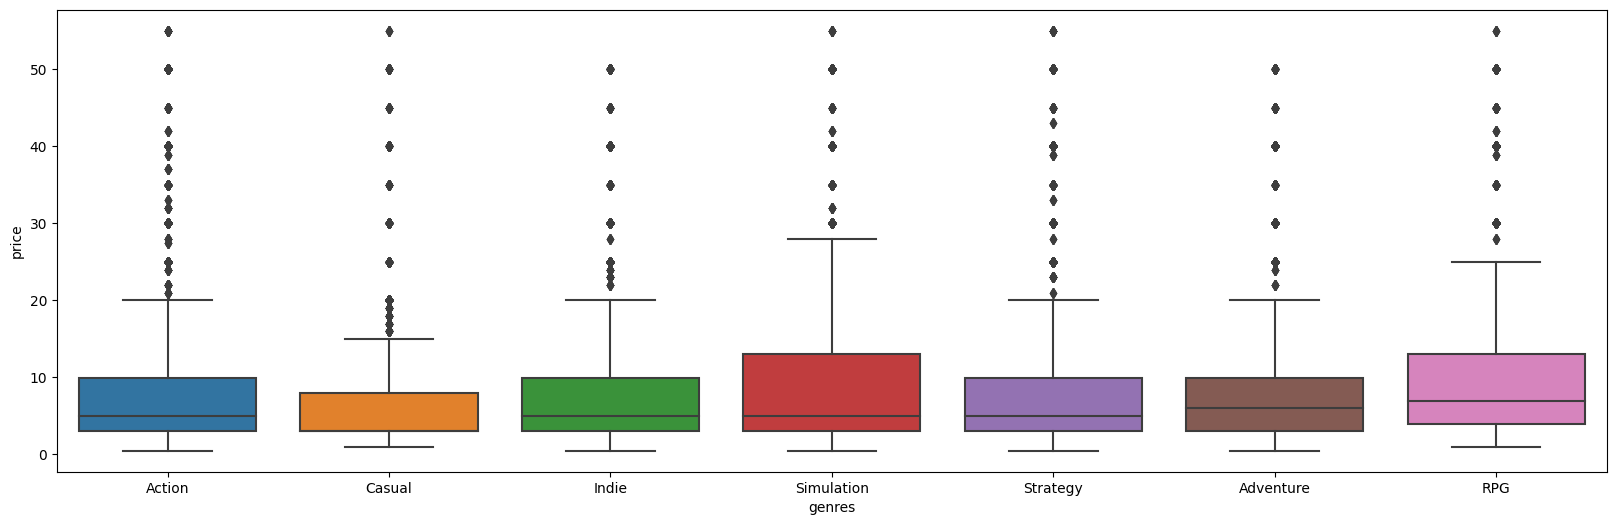

In [3083]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='genres', y='price',data=df2) #Diagramas de cajas por genres

<Axes: xlabel='genres', ylabel='price'>

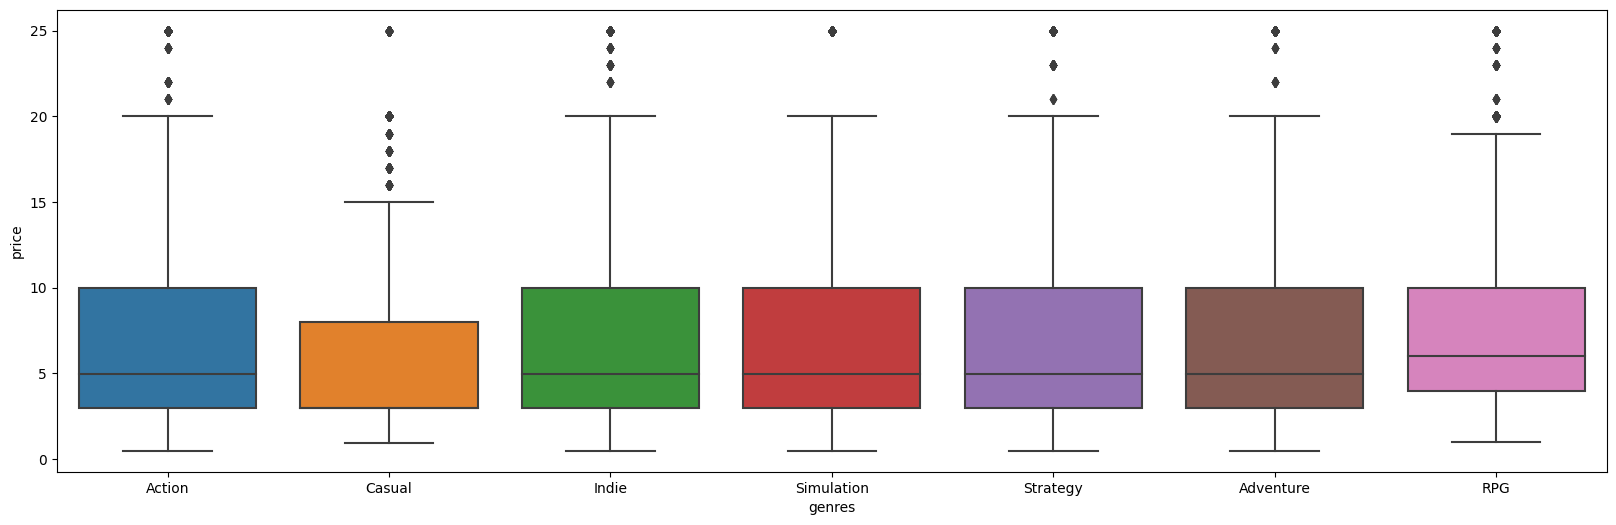

In [3084]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='genres', y='price',data=df2[df2['price']<25]) #Diagramas de cajas por genres filtrado por menores de 25

Del diagrama de cajas podemos concluir que para estos diferentes géneros el 75% tiene un precio por dejado de 10 y el 50% alrededor de 5.

In [3085]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255453 entries, 0 to 324455
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   genres        255453 non-null  object 
 1   app_name      255453 non-null  object 
 2   specs         255453 non-null  object 
 3   price         255453 non-null  float64
 4   early_access  255453 non-null  bool   
 5   sentiment     255453 non-null  int64  
 6   metascore     22603 non-null   float64
 7   release_year  255453 non-null  int64  
 8   anios         255453 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 17.8+ MB


In [3086]:
df2.head(20)

,genres,app_name,specs,price,early_access,sentiment,metascore,release_year,anios
0,Action,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
1,Casual,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
2,Indie,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
3,Simulation,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
4,Strategy,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
58,Action,弹炸人2222,Single-player,0.99,False,0,NaN,2017,6
59,Adventure,弹炸人2222,Single-player,0.99,False,0,NaN,2017,6
60,Casual,弹炸人2222,Single-player,0.99,False,0,NaN,2017,6
61,Action,Battle Royale Trainer,Single-player,3.99,False,5,NaN,2018,5
62,Action,Battle Royale Trainer,Steam Achievements,3.99,False,5,NaN,2018,5


7.g - Análisis de la variable specs

In [3087]:
df2.specs.nunique()

29

In [3088]:
df_specs = df2.drop_duplicates(subset=['app_name','specs'])

In [3089]:
df_specs.head(10)

,genres,app_name,specs,price,early_access,sentiment,metascore,release_year,anios
0,Action,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
58,Action,弹炸人2222,Single-player,0.99,False,0,NaN,2017,6
61,Action,Battle Royale Trainer,Single-player,3.99,False,5,NaN,2018,5
62,Action,Battle Royale Trainer,Steam Achievements,3.99,False,5,NaN,2018,5
78,Indie,SNOW - All Access Basic Pass,Single-player,9.99,False,0,NaN,2018,5
79,Indie,SNOW - All Access Basic Pass,Multi-player,9.99,False,0,NaN,2018,5
80,Indie,SNOW - All Access Basic Pass,Online Multi-Player,9.99,False,0,NaN,2018,5
81,Indie,SNOW - All Access Basic Pass,Cross-Platform Multiplayer,9.99,False,0,NaN,2018,5
82,Indie,SNOW - All Access Basic Pass,Downloadable Content,9.99,False,0,NaN,2018,5
83,Indie,SNOW - All Access Basic Pass,Steam Achievements,9.99,False,0,NaN,2018,5


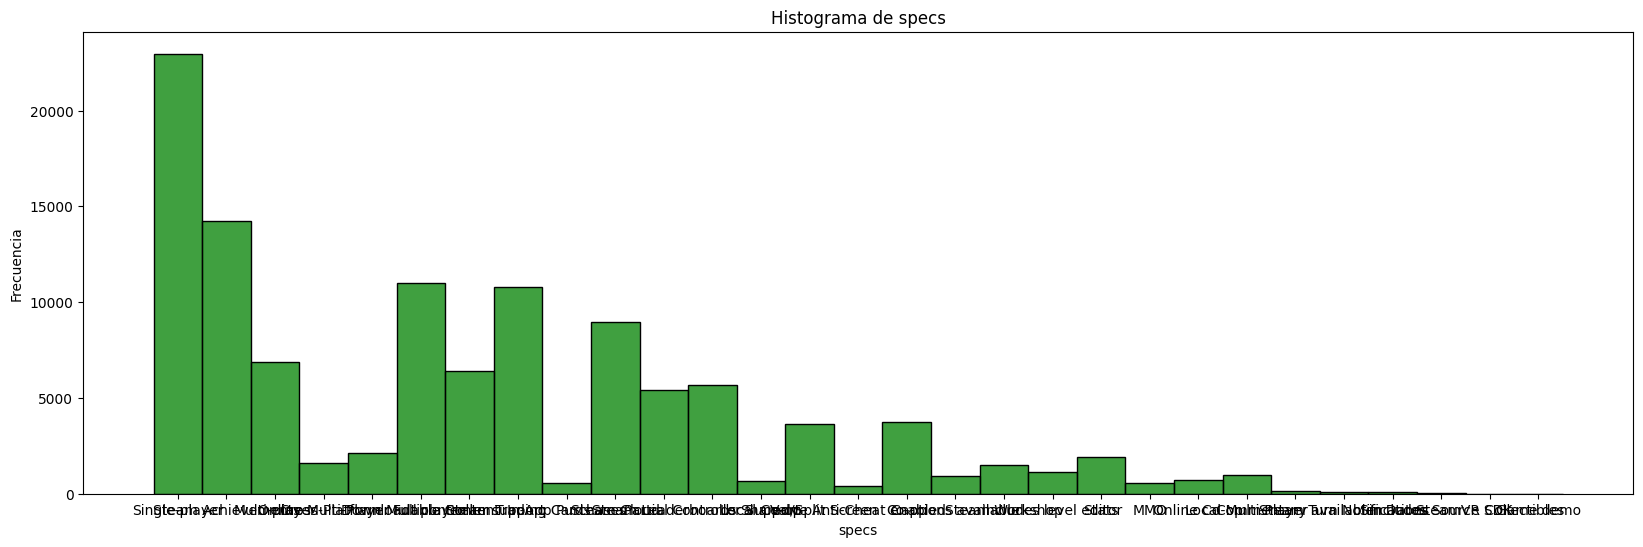

In [3090]:
plt.figure(figsize=(20, 6))
# Crear el histograma utilizando Seaborn
sns.histplot(data=df_specs, x='specs', kde=False, bins=23, color='green')

# Añadir etiquetas y título
plt.xlabel('specs')
plt.ylabel('Frecuencia')
plt.title('Histograma de specs')

# Mostrar el histograma
plt.show()

In [3091]:
bin_counts_specs = df_specs['specs'].value_counts() # Cálcula el conteo de observaciones en cada bin

In [3092]:
df_conteo = pd.DataFrame(bin_counts_specs).reset_index()  #Crea un data frame con los generos y el conteo - df_conteo es un data frame auxiliar
df_conteo.columns = ['specs', 'cantidad']

In [3093]:
df_conteo['porcentaje'] = round((df_conteo['cantidad']/df_specs.shape[0])*100,2)   #Crea una columna de porcentajes de los conteos 

In [3094]:
df_conteo.head(10)

,specs,cantidad,porcentaje
0,Single-player,22964,20.29
1,Steam Achievements,14254,12.60
2,Downloadable Content,10988,9.71
3,Steam Trading Cards,10800,9.54
4,Steam Cloud,8978,7.93
5,Multi-player,6892,6.09
6,Full controller support,6391,5.65
7,Partial Controller Support,5653,5.00
8,Steam Leaderboards,5407,4.78
9,Co-op,3731,3.30


De los resultados obtenidos d frecuencias de géneros, vamos en considerar los primeros 7, que representan aproximadamente el 85% del conjunto

In [3095]:
muestra = 0                             
item = 0
for i in range(0,df_conteo.shape[0]):
    if muestra <= 85:
        item +=1
        muestra = muestra + df_conteo.iloc[i,2]
    else:
        break
print(item-1)

10


In [3096]:
df_conteo.shape

(29, 3)

Eliminación de sepcs irrelevantes para el proceso

In [3097]:
lista_gen_del = df_conteo.iloc[10:30,0].to_list()    #Creacion de una lista para eliminar registros
lista_gen_del

['Shared/Split Screen',
 'Cross-Platform Multiplayer',
 'Stats',
 'Online Multi-Player',
 'Steam Workshop',
 'Includes level editor',
 'Local Multi-Player',
 'Captions available',
 'Online Co-op',
 'Local Co-op',
 'MMO',
 'In-App Purchases',
 'Valve Anti-Cheat enabled',
 'Commentary available',
 'Steam Turn Notifications',
 'Sin Datos',
 'Includes Source SDK',
 'SteamVR Collectibles',
 'Game demo']

In [3098]:
del df_specs
del df_conteo

In [3099]:
mask = df2['specs'].isin(lista_gen_del)    # Crear una máscara booleana para filtrar las filas a eliminar
df3 = df2[~mask]    # Eliminar las filas que cumplen con la condición - df3 es el data frame del proyecto (Rev.3)

In [3100]:
del df2

In [3101]:
df3.head(10)

,genres,app_name,specs,price,early_access,sentiment,metascore,release_year,anios
0,Action,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
1,Casual,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
2,Indie,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
3,Simulation,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
4,Strategy,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
58,Action,弹炸人2222,Single-player,0.99,False,0,NaN,2017,6
59,Adventure,弹炸人2222,Single-player,0.99,False,0,NaN,2017,6
60,Casual,弹炸人2222,Single-player,0.99,False,0,NaN,2017,6
61,Action,Battle Royale Trainer,Single-player,3.99,False,5,NaN,2018,5
62,Action,Battle Royale Trainer,Steam Achievements,3.99,False,5,NaN,2018,5


In [3102]:
df3.shape

(214859, 9)

<Axes: xlabel='specs', ylabel='price'>

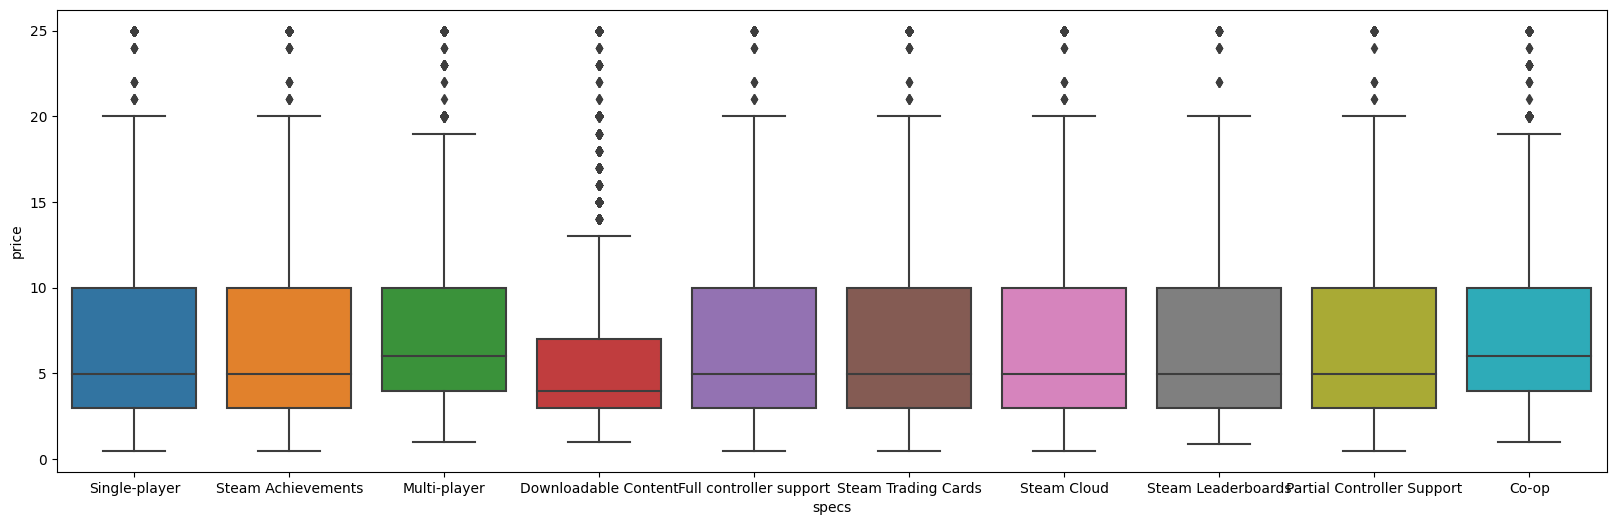

In [3103]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='specs', y='price',data=df3[df3['price']<25]) #Diagramas de cajas por genres filtrado por menores de 25

Del diagrama de cajas podemos concluir que para estos diferentes specs el 75% tiene un precio por dejado de 10 y el 50% alrededor de 5.

In [3104]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214859 entries, 0 to 324455
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   genres        214859 non-null  object 
 1   app_name      214859 non-null  object 
 2   specs         214859 non-null  object 
 3   price         214859 non-null  float64
 4   early_access  214859 non-null  bool   
 5   sentiment     214859 non-null  int64  
 6   metascore     19217 non-null   float64
 7   release_year  214859 non-null  int64  
 8   anios         214859 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 15.0+ MB


7.h - Análisis de la variable early_access

In [3105]:
df_early_access = df3.drop_duplicates(subset='app_name')

In [3106]:
df_early_access.head(10)

,genres,app_name,specs,price,early_access,sentiment,metascore,release_year,anios
0,Action,Lost Summoner Kitty,Single-player,4.99,False,0,NaN,2018,5
58,Action,弹炸人2222,Single-player,0.99,False,0,NaN,2017,6
61,Action,Battle Royale Trainer,Single-player,3.99,False,5,NaN,2018,5
78,Indie,SNOW - All Access Basic Pass,Single-player,9.99,False,0,NaN,2018,5
122,Indie,SNOW - All Access Pro Pass,Single-player,18.99,False,0,NaN,2018,5
166,Indie,SNOW - All Access Legend Pass,Single-player,29.99,False,0,NaN,2018,5
211,Action,Army of Tentacles: (Not) A Cthulhu Dating Sim:...,Single-player,10.99,False,0,NaN,2018,5
221,Casual,Beach Rules,Single-player,3.99,False,0,NaN,2018,5
223,Casual,Planetarium 2 - Zen Odyssey,Single-player,2.99,False,0,NaN,2018,5
226,Adventure,The first thrust of God,Single-player,1.59,False,0,NaN,2018,5


<Axes: xlabel='early_access', ylabel='price'>

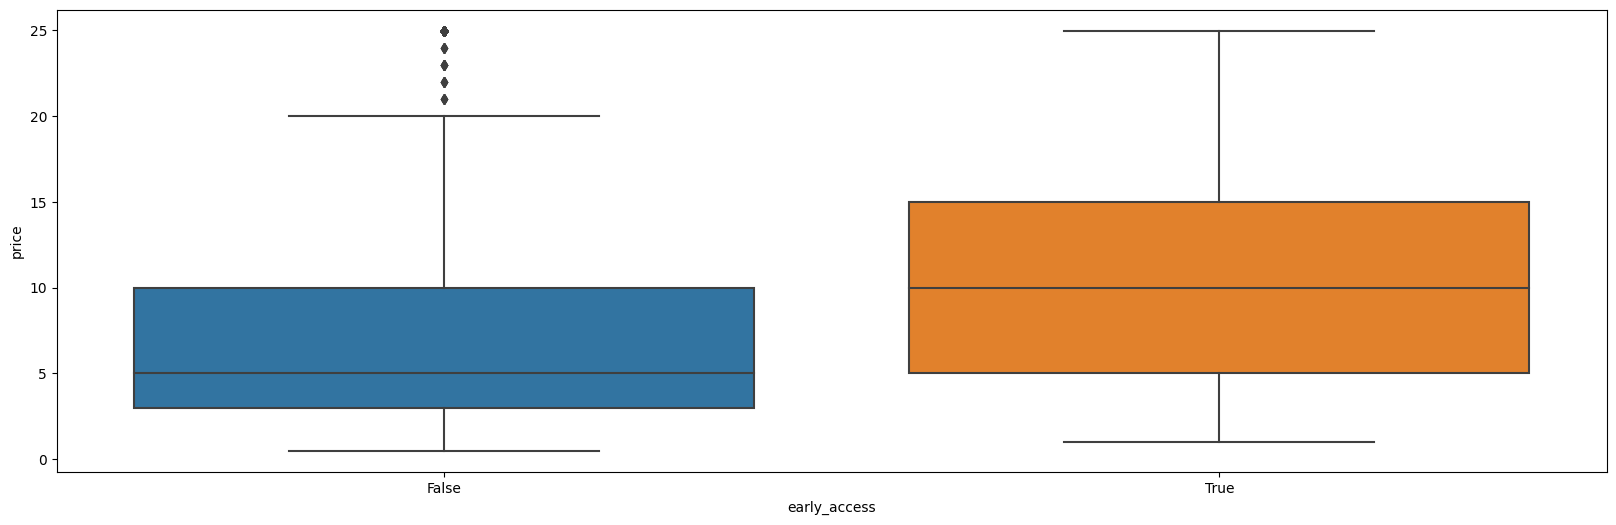

In [3107]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='early_access', y='price',data=df_early_access[df_early_access['price']<25]) #Diagramas de cajas por genres filtrado por menores de 25

Se observa una variación. Si early_acces es False el 50% de los juegos está por debajo de 5 y el 75% por debajo de 10. Pero para el caso de True, el 50% está por debajo de 10 y el 75% por debajo de 15.
Esto indica que hay una variación del precio por esta variable

In [3108]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214859 entries, 0 to 324455
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   genres        214859 non-null  object 
 1   app_name      214859 non-null  object 
 2   specs         214859 non-null  object 
 3   price         214859 non-null  float64
 4   early_access  214859 non-null  bool   
 5   sentiment     214859 non-null  int64  
 6   metascore     19217 non-null   float64
 7   release_year  214859 non-null  int64  
 8   anios         214859 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 15.0+ MB


In [3109]:
df4 = df3.copy()

In [3110]:
del df3

**8 – Eliminación de features irrelevantes**

8.a – Eliminación de variable specs

Por las conclusiones expuestas, a diferentes specs la distribución de price es muy similar

In [3111]:
columnas_a_eliminar = ['specs']
df4.drop(columns=columnas_a_eliminar, inplace=True)  

In [3112]:
df4.drop_duplicates(subset=['genres','app_name'], inplace=True)     

In [3113]:
df4.shape

(56434, 8)

In [3114]:
df4.replace({False: 0, True: 1}, inplace=True) 

In [3115]:
df4.head()

,genres,app_name,price,early_access,sentiment,metascore,release_year,anios
0,Action,Lost Summoner Kitty,4.99,0,0,NaN,2018,5
1,Casual,Lost Summoner Kitty,4.99,0,0,NaN,2018,5
2,Indie,Lost Summoner Kitty,4.99,0,0,NaN,2018,5
3,Simulation,Lost Summoner Kitty,4.99,0,0,NaN,2018,5
4,Strategy,Lost Summoner Kitty,4.99,0,0,NaN,2018,5


**9 – Matrices de correlación**

9.a – Matriz de correlación sin genres

In [3116]:
df_mc1 = df4.copy()

In [3117]:
df_mc1.drop_duplicates(subset='app_name', inplace=True)  #Elimina duplicados

In [3118]:
df_mc1.head()

,genres,app_name,price,early_access,sentiment,metascore,release_year,anios
0,Action,Lost Summoner Kitty,4.99,0,0,NaN,2018,5
58,Action,弹炸人2222,0.99,0,0,NaN,2017,6
61,Action,Battle Royale Trainer,3.99,0,5,NaN,2018,5
78,Indie,SNOW - All Access Basic Pass,9.99,0,0,NaN,2018,5
122,Indie,SNOW - All Access Pro Pass,18.99,0,0,NaN,2018,5


In [3119]:
eliminar_mc1 = ['genres', 'app_name']               #Las columnas app_name e imputación se eliminan por irrelevantes para este análisis
df_mc1 = df_mc1.drop(columns=eliminar_mc1)

In [3120]:
df_mc1.head()

,price,early_access,sentiment,metascore,release_year,anios
0,4.99,0,0,NaN,2018,5
58,0.99,0,0,NaN,2017,6
61,3.99,0,5,NaN,2018,5
78,9.99,0,0,NaN,2018,5
122,18.99,0,0,NaN,2018,5


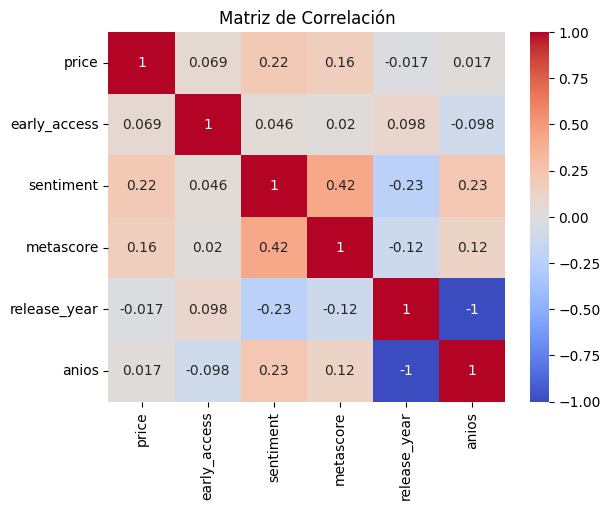

In [3121]:
# Calcular la matriz de correlación
matriz_correlacion = df_mc1.corr()

# Crear el mapa de calor con Seaborn
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')

# Mostrar el mapa de calor
plt.title('Matriz de Correlación')
plt.show()

Se observa cierto grado de correlación entre sentiment y metascore, y obviamnente la correlación entre release_year y anios

In [3122]:
df4.drop(columns=['metascore','anios'], axis=1, inplace=True) #Elimina metascore y anios por la correlación

9.b - Matriz de correlación incluyendo genres

A la variable genres, por tratarse de una variable cualitativa nominal, le vamos a aplicar One-Hot Encoding para su análisis respecto a la etiqueta

In [3123]:
df4.head(10)

,genres,app_name,price,early_access,sentiment,release_year
0,Action,Lost Summoner Kitty,4.99,0,0,2018
1,Casual,Lost Summoner Kitty,4.99,0,0,2018
2,Indie,Lost Summoner Kitty,4.99,0,0,2018
3,Simulation,Lost Summoner Kitty,4.99,0,0,2018
4,Strategy,Lost Summoner Kitty,4.99,0,0,2018
58,Action,弹炸人2222,0.99,0,0,2017
59,Adventure,弹炸人2222,0.99,0,0,2017
60,Casual,弹炸人2222,0.99,0,0,2017
61,Action,Battle Royale Trainer,3.99,0,5,2018
63,Adventure,Battle Royale Trainer,3.99,0,5,2018


In [3124]:
dfohe = pd.get_dummies(df4['genres'], prefix='genres')  #Data frame auxiliar para aplicar one-hot encoding a genres

dfohe.replace({False: 0, True: 1}, inplace=True) #Reemplazo de False y True por ceros y unos

df5 = pd.concat([df4, dfohe], axis=1)   #Concatenamos ambos data frames en df1. df2 data frame de proyecto (Rev. 2)

df5.drop('genres', axis=1, inplace=True) #Eliminamos la columna genres del data frame

In [3125]:
del dfohe
del df4

In [3126]:
df5.head() #Consulta del data frame

,app_name,price,early_access,sentiment,release_year,genres_Action,genres_Adventure,genres_Casual,genres_Indie,genres_RPG,genres_Simulation,genres_Strategy
0,Lost Summoner Kitty,4.99,0,0,2018,1,0,0,0,0,0,0
1,Lost Summoner Kitty,4.99,0,0,2018,0,0,1,0,0,0,0
2,Lost Summoner Kitty,4.99,0,0,2018,0,0,0,1,0,0,0
3,Lost Summoner Kitty,4.99,0,0,2018,0,0,0,0,0,1,0
4,Lost Summoner Kitty,4.99,0,0,2018,0,0,0,0,0,0,1


In [3127]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56434 entries, 0 to 324455
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   app_name           56434 non-null  object 
 1   price              56434 non-null  float64
 2   early_access       56434 non-null  int64  
 3   sentiment          56434 non-null  int64  
 4   release_year       56434 non-null  int64  
 5   genres_Action      56434 non-null  int64  
 6   genres_Adventure   56434 non-null  int64  
 7   genres_Casual      56434 non-null  int64  
 8   genres_Indie       56434 non-null  int64  
 9   genres_RPG         56434 non-null  int64  
 10  genres_Simulation  56434 non-null  int64  
 11  genres_Strategy    56434 non-null  int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 5.6+ MB


In [3128]:
df5.columns

Index(['app_name', 'price', 'early_access', 'sentiment', 'release_year',
       'genres_Action', 'genres_Adventure', 'genres_Casual', 'genres_Indie',
       'genres_RPG', 'genres_Simulation', 'genres_Strategy'],
      dtype='object')

In [3129]:
lista_mc2 = ['price', 'early_access', 'sentiment', 'release_year','genres_Action', 'genres_Adventure',
             'genres_Casual', 'genres_Indie', 'genres_RPG', 'genres_Simulation',
             'genres_Strategy']

In [3130]:
df_mc2 = df5[lista_mc2]

In [3131]:
df_mc2.head()

,price,early_access,sentiment,release_year,genres_Action,genres_Adventure,genres_Casual,genres_Indie,genres_RPG,genres_Simulation,genres_Strategy
0,4.99,0,0,2018,1,0,0,0,0,0,0
1,4.99,0,0,2018,0,0,1,0,0,0,0
2,4.99,0,0,2018,0,0,0,1,0,0,0
3,4.99,0,0,2018,0,0,0,0,0,1,0
4,4.99,0,0,2018,0,0,0,0,0,0,1


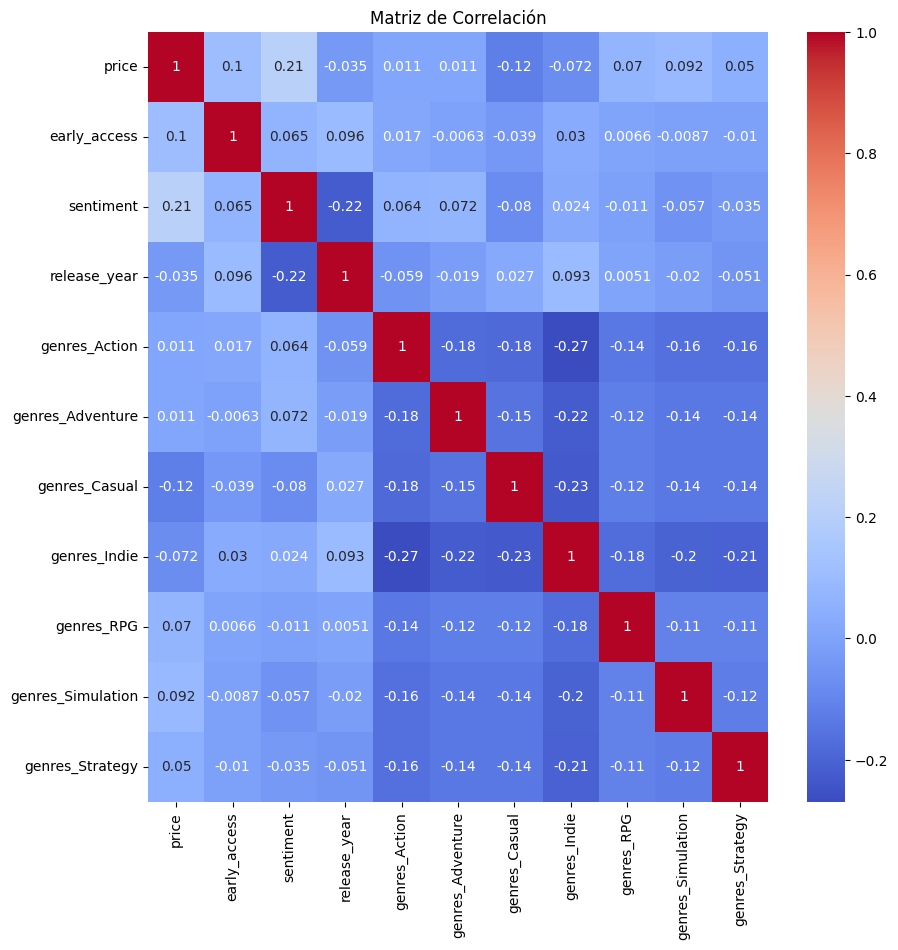

In [3132]:
plt.figure(figsize=(10, 10))
# Calcular la matriz de correlación
matriz_correlacion = df_mc2.corr()

# Crear el mapa de calor con Seaborn
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')

# Mostrar el mapa de calor
plt.title('Matriz de Correlación')
plt.show()

In [3133]:
df_modelo = df_mc2.copy()

In [3134]:
df_modelo.head()

,price,early_access,sentiment,release_year,genres_Action,genres_Adventure,genres_Casual,genres_Indie,genres_RPG,genres_Simulation,genres_Strategy
0,4.99,0,0,2018,1,0,0,0,0,0,0
1,4.99,0,0,2018,0,0,1,0,0,0,0
2,4.99,0,0,2018,0,0,0,1,0,0,0
3,4.99,0,0,2018,0,0,0,0,0,1,0
4,4.99,0,0,2018,0,0,0,0,0,0,1


**10 - Exportación**

In [3135]:
# Nombre del archivo Parquet
parquet_filename = 'steam_games_mod.parquet'

# Convertir el DataFrame a una tabla Arrow
table = pa.Table.from_pandas(df_modelo)

# Guardar la tabla Arrow en formato Parquet
pq.write_table(table, parquet_filename)